# Wrangle and Analyze weRateDogs Twitter Archive

### Introduction

 The dataset that we will be wrangling, analyzing and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.The Twitter archive is great, but it only contains very basic tweet information so we are going to gather the data using variety of sources, assess the data and clean the data

In [343]:

import pandas as pd
import numpy as np
import requests
import json
import os
import time
import tweepy
import seaborn as sn
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline


### Gather Data
The data sources that we are utlizing to gather data are below

Twitter-archive-enhanced.csv- This csv contains basic tweet data for all 5000+ of their tweets which only has ratings which brings down the dsize of this csv to 2356

Image predictions file-a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction

Additional Data via the Twitter API-twitter-archive-enhanced.csv does not have retweet count and favorite count which can be gatherting by querying twitter API

In [395]:
#Reading Twitter-archive-enhanced.csv
df_twitterArchive=pd.read_csv('data/twitter-archive-enhanced.csv')
df_twitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:

response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response

<Response [200]>

In [396]:
#we are going to create a folder named image_predictions if its not present and store image predictions in image-predictions.tsv file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
with open(os.path.join(folder_name,'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [10]:
df_image_predictions=pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')
display(df_image_predictions.head())
display(df_image_predictions.shape)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


(2075, 12)

In [16]:
## we are utilizing Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive.
##This additional data will include retweet count and favorite count.

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [17]:
df_twitterArchive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [18]:
tweet_IDS=df_twitterArchive['tweet_id'].values
json_list=[]
error_list=[]
for tweet_ID in tweet_IDS:
    try:
        json_object=api.get_status(tweet_ID,tweet_mode='extended')._json
        json_list.append(json_object)
    except tweepy.error.TweepError as error:
        error_list.append(tweet_ID)


Rate limit reached. Sleeping for: 767
Rate limit reached. Sleeping for: 766


In [11]:
api.get_status(892420643555336193,tweet_mode='extended')

Status(_api=<tweepy.api.API object at 0x000001A7521D7978>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 

In [19]:
json_file='json.txt'
with open(json_file, 'w') as output:
    for object_json in json_list:
        json.dump(object_json,output)
        output.write('\n')

In [397]:
tweet_data = []
with open(json_file, 'r') as file:
    line=file.readline()
    count=1
    while line:
        data=json.loads(line)
        tweet_id=data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        json_data = {'tweet_id':tweet_id,
                    'retweet_count': retweet_count, 
                     'favorite_count': favorite_count
                    }
        tweet_data.append(json_data)

        line = file.readline()

df_tweet_data = pd.DataFrame(tweet_data, 
                            columns = ['tweet_id',
                                        'retweet_count',
                                        'favorite_count'])

df_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7835,36750
1,892177421306343426,5801,31647
2,891815181378084864,3843,23838
3,891689557279858688,7997,40079
4,891327558926688256,8642,38272


In [398]:
df_tweet_data.to_csv('tweet_data_extra.csv', index = False)

In [399]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


## Programatic Data Assessment

In [402]:
#Displaying first 5 rows of all the gathered data sources
display(df_twitterArchive.head())
display(df_image_predictions.head())
display(df_tweet_data.head())


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7835,36750
1,892177421306343426,5801,31647
2,891815181378084864,3843,23838
3,891689557279858688,7997,40079
4,891327558926688256,8642,38272


In [403]:
#Displaying last 5 rows of all the gathered data sources
display(df_twitterArchive.tail())
display(df_image_predictions.tail())
display(df_tweet_data.tail())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


,tweet_id,retweet_count,favorite_count
2328,666049248165822465,41,99
2329,666044226329800704,134,278
2330,666033412701032449,43,117
2331,666029285002620928,43,121
2332,666020888022790149,473,2457


In [404]:
#top 20 retweets
df_tweet_data.sort_values('retweet_count',ascending=False).head(20)

,tweet_id,retweet_count,favorite_count
1017,744234799360020481,79252,158782
1057,739238157791694849,58720,117256
517,807106840509214720,57783,122647
397,822872901745569793,44696,135380
65,879415818425184262,41236,100705
433,819004803107983360,38104,89501
430,819015337530290176,38104,0
520,806629075125202948,36140,77465
129,866450705531457537,33555,118103
1743,678399652199309312,31935,79603


In [405]:
#top 20 favorite_tweets
df_tweet_data.sort_values('favorite_count',ascending=False).head(20)

,tweet_id,retweet_count,favorite_count
1017,744234799360020481,79252,158782
397,822872901745569793,44696,135380
517,807106840509214720,57783,122647
129,866450705531457537,33555,118103
1057,739238157791694849,58720,117256
65,879415818425184262,41236,100705
433,819004803107983360,38104,89501
162,859196978902773760,29136,87684
1743,678399652199309312,31935,79603
111,870374049280663552,24924,79545


In [32]:
display(df_twitterArchive.info())
display(df_image_predictions.info())
display(df_tweet_data_extra.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


None

In [45]:
display(df_twitterArchive.describe())
display(df_image_predictions.describe())
display(df_tweet_data_extra.describe())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2759.665238,7665.815259
std,6.820607e+16,4669.955114,11899.696036
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,555.000000,1330.000000
50%,7.184547e+17,1291.000000,3336.000000
75%,7.986654e+17,3210.000000,9409.000000
max,8.924206e+17,79252.000000,158782.000000


In [33]:
df_twitterArchive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Buddy          7
an             7
Toby           7
Bailey         7
Stanley        6
Jack           6
Jax            6
Koda           6
Scout          6
Bella          6
Milo           6
Leo            6
Rusty          6
Dave           6
Oscar          6
very           5
            ... 
Link           1
Molly          1
Zoe            1
Geoff          1
Brooks         1
Eugene         1
Stella         1
Sparky         1
Zeek           1
Kuyu           1
Fido           1
Brian          1
Diogi          1
Chadrick       1
Grizzie        1
Ron            1
Griswold       1
Dallas         1
Rinna          1
Apollo         1
Amber          1
Barry          1
Mya            1
Devón          1
Brady          1
Lulu           1
Brockly        1
Humphrey      

In [410]:
# one of the common characteristic  that can be observed is that the dog names start with capitalized letter.
#for example you can see above 'a' is probably not a dog name and there are many such names
#below cell will print out few names 
#that start with non-capitalized letter and will display total number of such names present
non_cap_names=df_twitterArchive['name'].str.contains('^[a-z]', regex = True)
display(df_twitterArchive[non_cap_names]['name'].head())
df_twitterArchive[non_cap_names]['name'].value_counts().sum()

22      such
56         a
118    quite
169    quite
193    quite
Name: name, dtype: object

109

In [65]:
df_twitterArchive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [41]:
#finding out the rows which has rating_denominator 0 
df_twitterArchive[df_twitterArchive['rating_denominator'] == 0 ]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [411]:
#finding out the rows which has rating_numerator 0 

df_twitterArchive[df_twitterArchive['rating_numerator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [412]:
#number of tweets that does not have a valid denominator, since denominator is always 10 
#we are trying to figure out the rows which have denominator not equals to 10
invalid_denominators=df_twitterArchive[df_twitterArchive['rating_denominator']!=10].sort_values('rating_denominator',ascending=False)
display(invalid_denominators.head())
display(len(invalid_denominators))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


23

In [413]:
len(df_twitterArchive[df_twitterArchive['rating_denominator']>10])


20

In [107]:
#display tweets that have numerator >10
numerator_values=df_twitterArchive[df_twitterArchive['rating_numerator']>10]['rating_numerator'].value_counts()
#detecting outliers, looking at the output below we can see that the frequency of higher values starts decreasing when numerator is
#equal to 15, 15 occurs only 2 times so we can determine the cut off here on what our numerators wants to be, since 
# 15 is a reasoable number, I am taking into consideration all the numerators as valid if the value is <=15
numerator_values_15=df_twitterArchive[df_twitterArchive['rating_numerator']>=15]

numerator_values_15['rating_numerator'].value_counts()

15      2
420     2
75      2
88      1
143     1
99      1
165     1
80      1
144     1
44      1
204     1
45      1
60      1
27      1
1776    1
17      1
50      1
26      1
84      1
182     1
20      1
24      1
121     1
666     1
960     1
Name: rating_numerator, dtype: int64

In [110]:
denominator_10=numerator_values_15[numerator_values_15['rating_denominator']==10]
denominator_10['rating_numerator'].value_counts()

15      2
75      2
420     2
26      1
27      1
666     1
182     1
17      1
1776    1
Name: rating_numerator, dtype: int64

In [414]:
#out of all the values which have numerator greater than 15, am considering tweet as valid only if the denominator is 10
valid_tweets=df_twitterArchive[(df_twitterArchive['rating_denominator']==10) & (df_twitterArchive['rating_numerator']>=15)&
                       (df_twitterArchive['in_reply_to_status_id'].isnull())
                       & (df_twitterArchive['retweeted_status_id'].isnull())]
valid_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [415]:
#tweets that does not have missing urls
df_twitterArchive['expanded_urls'].isnull().sum()

59

In [416]:
#number of tweets that are missing urls excluding reweets and replies
missing_urls=df_twitterArchive[df_twitterArchive['expanded_urls'].isnull()& df_twitterArchive['retweeted_status_id'].isnull()
                  & df_twitterArchive['in_reply_to_status_id'].isnull()]
missing_urls.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [64]:
df_image_predictions['tweet_id'].values in actual_tweets['tweet_id'].values

C:\Users\rpalavarapu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

###### Actual tweets that are missing urls excluding reweets and replies are not in predictions

In [121]:
assert [df_twitterArchive.duplicated() == False]
assert [df_image_predictions.duplicated() == False]
assert [df_tweet_data_extra.duplicated() == False]


## Cleaning The Data

In [551]:
#copying all the data sources to perform the cleaning
df_twitterArchive_clean=df_twitterArchive.copy()
df_image_predictions_clean=df_image_predictions.copy()
df_tweet_data_clean=df_tweet_data.copy()

In [456]:
df_twitterArchive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Cleaning Twitter archive table¶


In [552]:
df_twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [553]:
df_twitterArchive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Tidiness Issue 1:There are 4 columns for 4 dog stages, we are melting everything into one column dog_type_value

In [554]:
##df_twitterArchive_clean['dog_type']=df_twitterArchive_clean['doggo'].cat(df_twitterArchive_clean['floffer']).str.cat(df_twitterArchive_clean['pupper']).str.cat(df_twitterArchive_clean['puppo'])

df_twitterArchive_clean['stage'] = df_twitterArchive_clean['text'].str.extract('(doggo|puppo|pupper|floofer)',expand=True)

In [555]:
df_twitterArchive_clean = df_twitterArchive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


###### Test

In [557]:

df_twitterArchive_clean['stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stage, dtype: int64

###### Test

In [558]:
#checking to see if old columns have been deleted
df_twitterArchive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')


#### Tidiness Issue 2:Merge the df_tweet_data_extra into the df_twitterArchive_clean using inner join.¶

In [559]:
df_twitterArchive_clean=pd.merge(df_twitterArchive_clean,df_tweet_data_extra,on='tweet_id',how='inner')

###### Test

In [560]:
#querying for retweet_count and favorite_count in df_twitterArchive_clean after merging
df_twitterArchive_clean[['retweet_count','favorite_count']].head()

,retweet_count,favorite_count
0,7835,36750
1,5801,31647
2,3843,23838
3,7997,40079
4,8642,38272


In [512]:
df_twitterArchive_clean.shape

(9424, 15)

#### Quality Issue 1:Remove the columns which has more missing data and therefore not useful for analysis

In [561]:
df_twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2332
Data columns (total 16 columns):
tweet_id                      2333 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2333 non-null object
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           165 non-null float64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          2333 non-null object
stage                         394 non-null object
retweet_count                 2333 non-null int64
favorite_count                2333 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 309.9+ KB


In [562]:
##From the above information it looks like in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id
##,retweeted_status_timestamp are the columns that has more missing values and we need to drop them

In [563]:
columns_toDrop=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
df_twitterArchive_clean=df_twitterArchive_clean.drop(columns_toDrop,axis=1)

###### Test

In [564]:
#Querying for the columns to make sure all the unwanted columns are deleted
df_twitterArchive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [565]:
df_twitterArchive_clean.shape

(2333, 11)

#### Quality Issue 2:Remove the values that have numerator as 0(we have determined that there are 2 such values in our programatic assesment)

In [566]:
df_twitterArchive_clean=df_twitterArchive_clean[df_twitterArchive_clean['rating_numerator'] != 0 ]
df_twitterArchive_clean.shape

(2331, 11)

###### Test

In [567]:
#Querying to see if we have any rows with rating_numerator =0
df_twitterArchive_clean[df_twitterArchive_clean['rating_numerator'] == 0 ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


#### Quality Issue 3:Remove the values greater than 15 in the numerator(these are the values that are casuing the mean to be more than what it should be)

In [568]:
len(df_twitterArchive_clean[df_twitterArchive_clean['rating_numerator']>15 ])
df_twitterArchive_clean=df_twitterArchive_clean[df_twitterArchive_clean['rating_numerator'] <=15 ]

###### Test

In [569]:
#Querying to see if we have any rows with rating_numerator >15
len(df_twitterArchive_clean[df_twitterArchive_clean['rating_numerator']>15 ])

0

#### Quality Issue 4:Remove the values of the denominator which are not equal to 10

In [570]:
df_twitterArchive_clean = df_twitterArchive_clean[df_twitterArchive_clean['rating_denominator'] == 10 ]


###### Test

In [571]:
#Querying to see if we still have rows with rating_denominator not equal to 10
df_twitterArchive_clean[df_twitterArchive_clean['rating_denominator'] != 10 ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


#### Quality Issue 5:Change the data type of time stamp column to date time

In [572]:
df_twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 0 to 2332
Data columns (total 11 columns):
tweet_id              2299 non-null int64
timestamp             2299 non-null object
source                2299 non-null object
text                  2299 non-null object
expanded_urls         2248 non-null object
rating_numerator      2299 non-null int64
rating_denominator    2299 non-null int64
name                  2299 non-null object
stage                 386 non-null object
retweet_count         2299 non-null int64
favorite_count        2299 non-null int64
dtypes: int64(5), object(6)
memory usage: 215.5+ KB


In [573]:
df_twitterArchive_clean['timestamp']=pd.to_datetime(df_twitterArchive_clean['timestamp'])


###### Test

In [574]:
#Querying to check timestamp data type
df_twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 0 to 2332
Data columns (total 11 columns):
tweet_id              2299 non-null int64
timestamp             2299 non-null datetime64[ns]
source                2299 non-null object
text                  2299 non-null object
expanded_urls         2248 non-null object
rating_numerator      2299 non-null int64
rating_denominator    2299 non-null int64
name                  2299 non-null object
stage                 386 non-null object
retweet_count         2299 non-null int64
favorite_count        2299 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 215.5+ KB


#### Quality Issue 6:Clean the source column and make it readable

In [575]:
df_twitterArchive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2166
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [576]:
df_twitterArchive_clean['source']=df_twitterArchive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
df_twitterArchive_clean['source']=df_twitterArchive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine-Make a Scene')
df_twitterArchive_clean['source']=df_twitterArchive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
df_twitterArchive_clean['source']=df_twitterArchive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

###### Test

In [577]:
#Querying for changed source values
df_twitterArchive_clean['source'].value_counts()


Twitter for iPhone    2166
Vine-Make a Scene       91
Twitter Web Client      33
TweetDeck                9
Name: source, dtype: int64

#### Quality Issue 7:Renaming incorrect dog names

In [578]:
##In our prgoramatic assesment above we have determined that all the dog names start with capitalized letter, all the names 
##that start with non capitalized letter needs to be moved to none

non_dogNames_list=df_twitterArchive_clean[df_twitterArchive_clean['name'].str.contains('^[a-z]', regex = True)]['name'].value_counts()
for name in non_dogNames_list.index:
    df_twitterArchive_clean['name'].replace(name,'None',inplace=True)

###### Test

In [579]:
#testing to see if the data frame still has any non dog names and it should return empty
df_twitterArchive_clean[df_twitterArchive_clean['name'].str.contains('^[a-z]', regex = True)]['name']


Series([], Name: name, dtype: object)

### Image Predictions Table

In [580]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [581]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality Issue 1:Renaming columns corresponding to p1,p2 and p3

In [582]:
df_image_predictions_clean.rename(columns={'p1':'first_probability', 'p1_conf': 'confidence_intervel1', 'p1_dog': 'first_dog',
                                  'p2': 'second_probability', 'p2_conf': 'confidence_intervel2', 'p2_dog': 'second_dog',
                                  'p3': 'third_probability', 'p3_conf': 'confidence_intervel3', 'p3_dog': 'third_dog'}, inplace = True)

###### Test

In [583]:
#Querying for changed column names
df_image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_probability',
       'confidence_intervel1', 'first_dog', 'second_probability',
       'confidence_intervel2', 'second_dog', 'third_probability',
       'confidence_intervel3', 'third_dog'],
      dtype='object')

#### Quality Issue 2:Deleting rows which are not dogs from first_probability 

In [584]:
not_dogNames=df_image_predictions_clean[df_image_predictions_clean.groupby('first_probability')['first_probability'].transform('size')==1]
not_dogNames['first_probability'].value_counts().head()

prayer_rug    1
maillot       1
sunglasses    1
sandbar       1
washer        1
Name: first_probability, dtype: int64

In [585]:
##Excluding all rows which have probablity of occuring only once since there are many invalid dog names

In [586]:
df_image_predictions_clean=df_image_predictions_clean[df_image_predictions_clean.groupby('first_probability')['first_probability'].transform('size')>1]


###### Test

In [587]:
#checking to see if we have any rows with first_probability size as 1
df_image_predictions_clean[df_image_predictions_clean.groupby('first_probability')['first_probability'].transform('size')==1]


,tweet_id,jpg_url,img_num,first_probability,confidence_intervel1,first_dog,second_probability,confidence_intervel2,second_dog,third_probability,confidence_intervel3,third_dog


## Visualization

#### Distribution of the Source

Text(0.5, 1.0, 'Distribution of the Source')

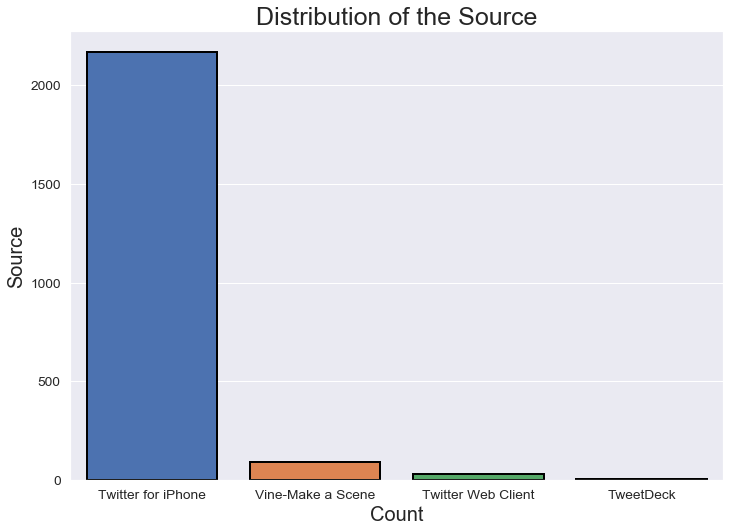

In [588]:
source_values = df_twitterArchive_clean['source'].value_counts().index
sn.set(rc={'figure.figsize':(11.7,8.27)})
plt.rcParams['font.family'] = 'Times New Roman'
sn.set(style="whitegrid")
sn.set(font_scale=1.25)
sn.countplot(data = df_twitterArchive_clean, x = 'source', order= source_values,edgecolor=(0,0,0),linewidth=2,saturation=1)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Source', fontsize=20)
plt.title('Distribution of the Source',fontsize=25)

#### Visualizing first probability

Text(0.5, 1.0, 'Distribution of first probability')

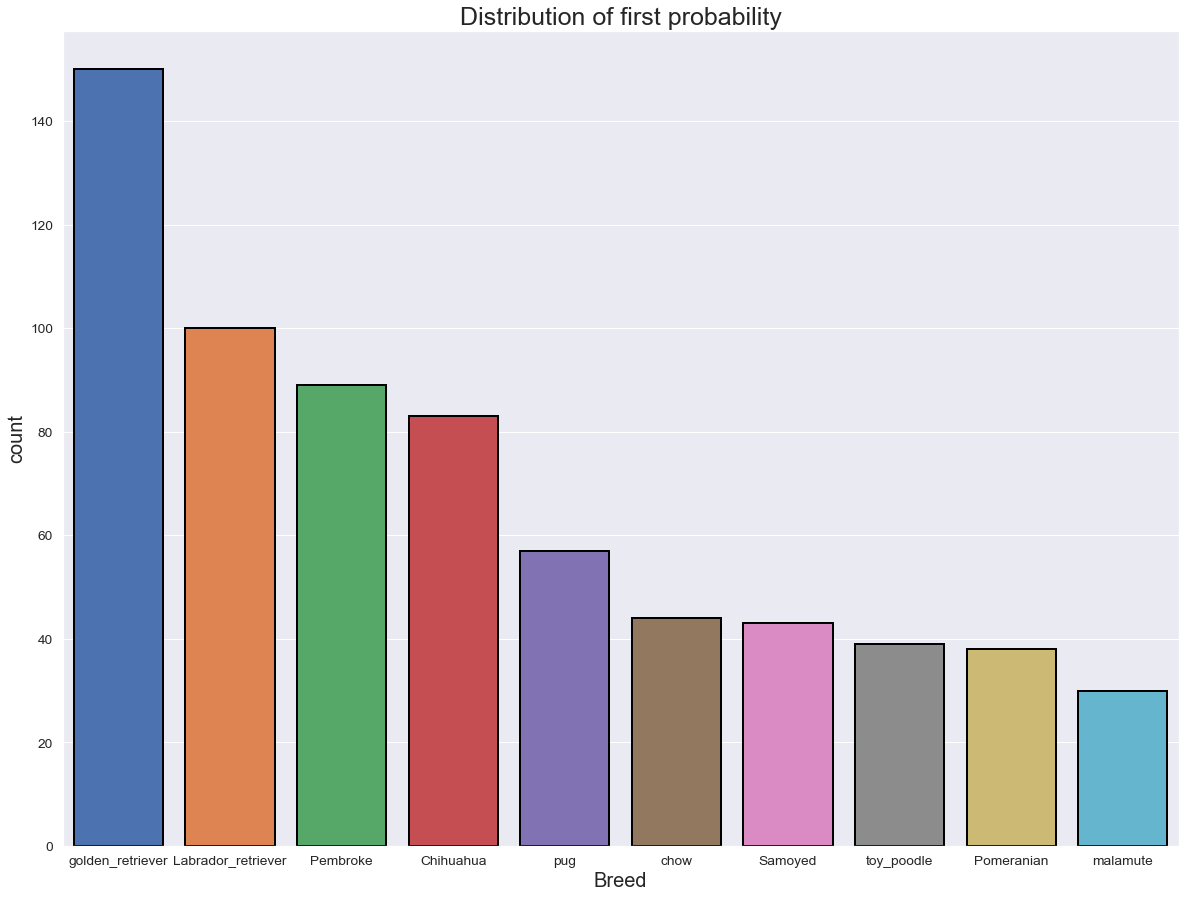

In [589]:

first_predictions=df_image_predictions_clean['first_probability'].value_counts().head(10)
sn.set(rc={'figure.figsize':(20,15)})
plt.rcParams['font.family'] = 'Times New Roman'
sn.set(style="whitegrid")
sn.set(font_scale=1.25)
sn.countplot(data = df_image_predictions_clean, x = 'first_probability', order= first_predictions.index,edgecolor=(0,0,0),linewidth=2,saturation=1)
plt.xticks(rotation = 360)
plt.xlabel('Breed', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Distribution of first probability',fontsize=25)

#### Relationship between retweet  count and favorite count

In [590]:
df_twitterArchive_clean.corr(method='spearman')
#There seems to be a very strong positive correlation between retweet count and favorite count with rs of 0.707

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
tweet_id,1.000000,0.607539,NaN,0.698511,0.594256
rating_numerator,0.607539,1.000000,NaN,0.490769,0.428541
rating_denominator,NaN,NaN,NaN,NaN,NaN
retweet_count,0.698511,0.490769,NaN,1.000000,0.707535
favorite_count,0.594256,0.428541,NaN,0.707535,1.000000


C:\Users\rpalavarapu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


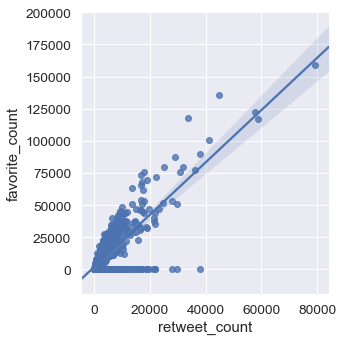

In [591]:
sn.lmplot(x="retweet_count", y="favorite_count", data=df_twitterArchive_clean);


In [592]:
df_twitterArchive_clean.head()
df_image_predictions_clean.head()
final_df=pd.merge(df_twitterArchive_clean,df_image_predictions_clean,how='outer',on='tweet_id')


In [593]:
final_df.to_csv('twitter_archive_master.csv',index=False)
